<a href="https://colab.research.google.com/github/zfaria/tech-challenge-exportacoes/blob/main/Testes_tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [ ]:
dados_vinho_mesa = pd.read_csv("/content/teste.csv", encoding="UTF-8", skiprows=1, sep=";") # Leitura do csv para Dataframe

anos = list(range(1970,2007)) # Criando uma lista entre 1970 e 2006
anos = list(map(str,anos)) # Convertendo todos os valores da lista para string
anos_aux = [ano + '.1' for ano in anos] # copiando a lista porém adicionando o pós fixo '.1'
anos_final = anos + anos_aux # concatenando as duas listas

dados_vinho_mesa = dados_vinho_mesa.drop(anos_final, axis=1) # removendo colunas não necessárias

columns_to_melt = list(dados_vinho_mesa.columns) # criando a lista de colunas
columns_to_melt.pop(0) # deletando a coluna Id
columns_to_melt.pop(0) # deletando a coluna país

dados_vinho = dados_vinho_mesa.melt(
    id_vars = ['Id','País'],
    value_vars = columns_to_melt,
    var_name = 'ano',
    value_name = 'valor'
) # Derretando o Dataframe deixando apenas as colunas Id e país fixas

dados_vinho['Medida'] = dados_vinho['ano'].apply(lambda valor: 'Valor' if valor.endswith('.1') else 'Quantidade') # Aplicando regra para nomeação de medida
dados_vinho['ano'] = dados_vinho['ano'].str.replace('.1','') # Removendo .1 do ano
dados_vinho['ano'] = dados_vinho['ano'].replace({'21':'2011', '22':'2012', '23':'2013', '24':'2014','25':'2015','26':'2016','27':'2017','28':'2018','29':'2019'})
dados_vinho.iloc[768:1024] = dados_vinho.iloc[768:1024].replace({'20':'2010'})
dados_vinho.iloc[3584:3840] = dados_vinho.iloc[3584:3840].replace({'20':'2021'})
df_vinho_valor = dados_vinho[dados_vinho['Medida'] == 'Valor']
df_vinho_quantidade = dados_vinho[dados_vinho['Medida'] == 'Quantidade']
dados_vinho


<ipython-input-40-0af24d743335>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  dados_vinho['ano'] = dados_vinho['ano'].str.replace('.1','') # Removendo .1 do ano


,Id,País,ano,valor,Medida
0,1,Afeganistão,2007,0,Quantidade
1,2,África do Sul,2007,0,Quantidade
2,3,"Alemanha, República Democrática",2007,119512,Quantidade
3,4,Angola,2007,25931,Quantidade
4,5,Anguilla,2007,0,Quantidade
...,...,...,...,...,...
4091,124,Tuvalu,2022,0,Valor
4092,125,Uruguai,2022,997367,Valor
4093,126,Vanuatu,2022,0,Valor
4094,127,Venezuela,2022,32351,Valor


In [ ]:
df_vinho_valor

,Id,País,ano,valor,Medida
128,1,Afeganistão,2007,0,Valor
129,2,África do Sul,2007,0,Valor
130,3,"Alemanha, República Democrática",2007,238052,Valor
131,4,Angola,2007,49753,Valor
132,5,Anguilla,2007,0,Valor
...,...,...,...,...,...
4091,124,Tuvalu,2022,0,Valor
4092,125,Uruguai,2022,997367,Valor
4093,126,Vanuatu,2022,0,Valor
4094,127,Venezuela,2022,32351,Valor


In [ ]:
df_vinho_quantidade

,Id,País,ano,valor,Medida
0,1,Afeganistão,2007,0,Quantidade
1,2,África do Sul,2007,0,Quantidade
2,3,"Alemanha, República Democrática",2007,119512,Quantidade
3,4,Angola,2007,25931,Quantidade
4,5,Anguilla,2007,0,Quantidade
...,...,...,...,...,...
3963,124,Tuvalu,2022,0,Quantidade
3964,125,Uruguai,2022,637117,Quantidade
3965,126,Vanuatu,2022,0,Quantidade
3966,127,Venezuela,2022,23220,Quantidade


In [ ]:
df_vinho_valor['valor'] = (df_vinho_valor['valor'] / 1000000)

<ipython-input-43-774fb14cc338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinho_valor['valor'] = (df_vinho_valor['valor'] / 1000000)


In [ ]:
df_vinho_quantidade['valor'] = (df_vinho_quantidade['valor'] / 1000000)

<ipython-input-44-ce6de57daf6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinho_quantidade['valor'] = (df_vinho_quantidade['valor'] / 1000000)


In [ ]:
df_agrupado_ano = df_vinho_valor.groupby('ano')['valor'].sum().reset_index()
df_agrupado_ano

,ano,valor
0,2007,3.686150
1,2008,7.118100
2,2009,8.940988
3,2010,2.595303
4,2011,3.615120
5,2012,5.521293
6,2013,22.744845
7,2014,7.472795
8,2015,2.769160
9,2016,4.434704


In [ ]:
df_agrupado_quantidade = df_vinho_quantidade.groupby('ano')['valor'].sum().reset_index()
df_agrupado_quantidade

,ano,valor
0,2007,3.281752
1,2008,10.346323
2,2009,25.514198
3,2010,1.280574
4,2011,1.214834
5,2012,5.775376
6,2013,9.149059
7,2014,2.324029
8,2015,1.198479
9,2016,1.786549


##Exportação dos vinhos de mesa nos últimos 15 anos

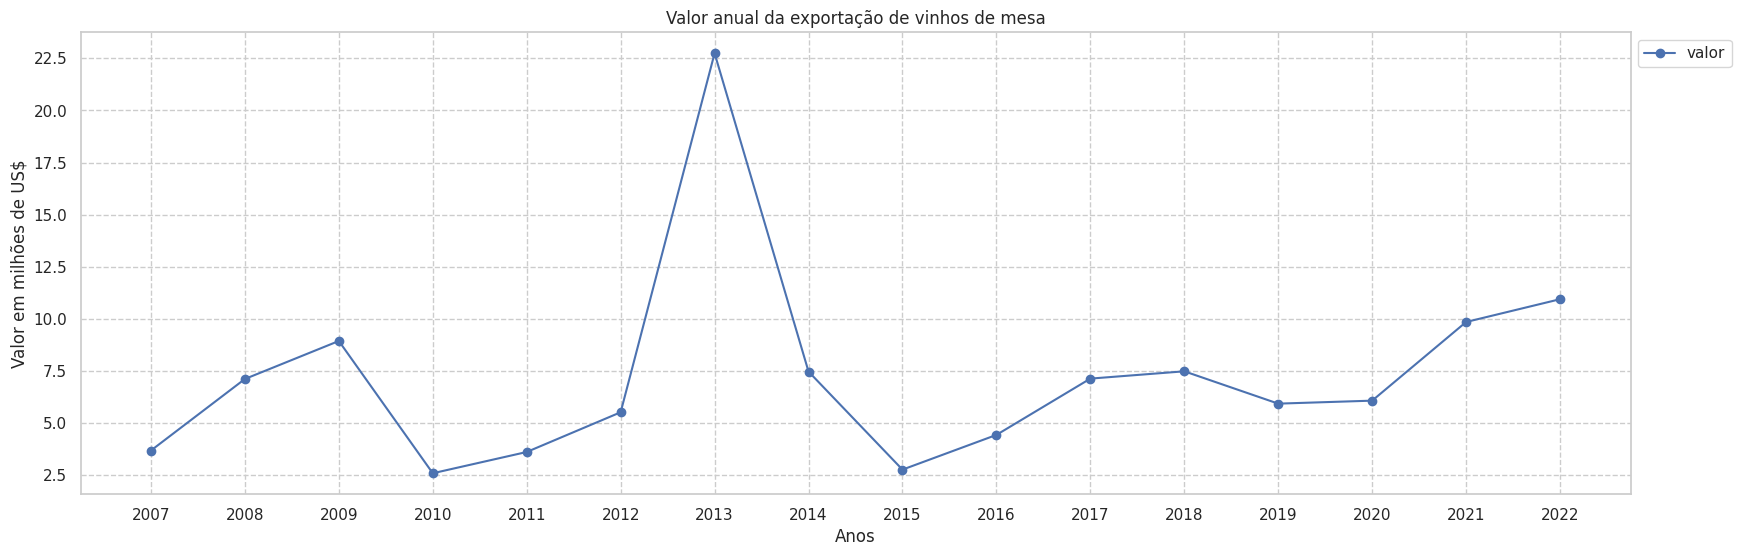

In [ ]:
df_agrupado_ano.plot(x='ano', y='valor',figsize=(20,6), marker='o')
plt.title("Valor anual da exportação de vinhos de mesa")
plt.xlabel("Anos")
plt.ylabel("Valor em milhões de US$")
plt.xticks(ticks= np.arange(0, 16, step=1) , labels = df_agrupado_ano['ano'])
plt.grid(True, linestyle = "--")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

É notado que as receitas dos anos de 2009 e 2013 foram os anos mais expressivos até 2020. Ano de 2013 foi o ano com o maior valor de receita em todo o período. Deve-se levar em consideração que no ano de 2010 obteve-se a maior queda em todo o período assim como o ano de 2015. a partir do ano de 2016 a exportação de vinhos apresentou melhoras ano após ano, com o ano de 2022 tomando o lugar de 2009 como o segundo ano mais lucrativo do período.

##Quantidade exportada dos vinhos de mesa nos últimos 15 anos



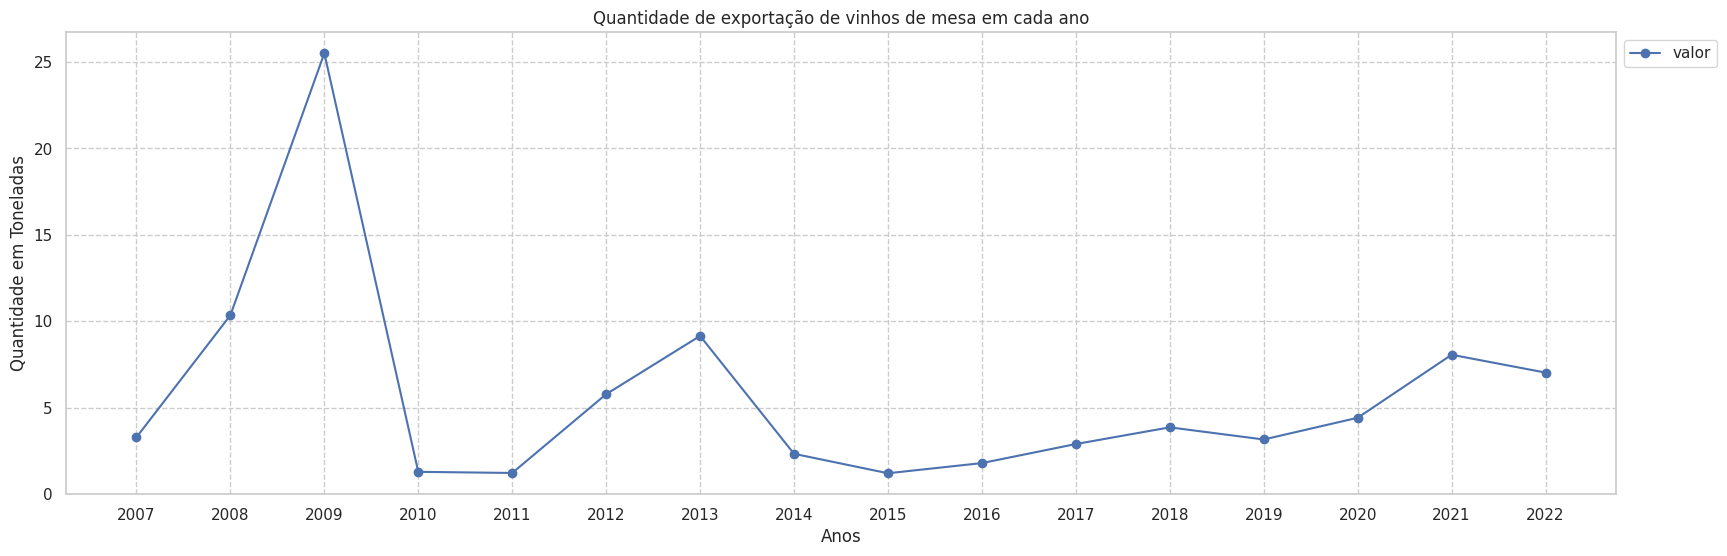

In [ ]:
df_agrupado_quantidade.plot(x='ano', y='valor',figsize=(20,6), marker='o')
plt.title("Quantidade de exportação de vinhos de mesa em cada ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade em Toneladas")
plt.xticks(ticks= np.arange(0, 16, step=1) , labels = df_agrupado_ano['ano'])
plt.grid(True, linestyle = "--")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

A exportação dos anos de 2009 e 2013 foram os mais expressivos em todo o período. No entanto o ano de 2009 foi o ano em que se teve a maior quantidade de vinhos de mesa exportado e ano de 2013 menor comparado ao ano de 2009.

In [ ]:
df_maiores_gastos = df_vinho_valor.sort_values(by="valor", ascending=False)
df_maiores_gastos = df_maiores_gastos.drop(['Id', 'ano', 'Medida'], axis=1)
df_maiores_gastos = df_maiores_gastos.loc[1769:3797]
df_maiores_gastos = df_maiores_gastos.groupby("País").sum()
df_maiores_gastos

,valor
País,
Afeganistão,0.000046
"Alemanha, República Democrática",2.784446
Angola,0.625942
Antilhas Holandesas,0.160864
Antígua e Barbuda,0.007738
...,...
Vanuatu,0.000031
Venezuela,0.116198
Vietnã,0.013013


<function matplotlib.pyplot.show(close=None, block=None)>

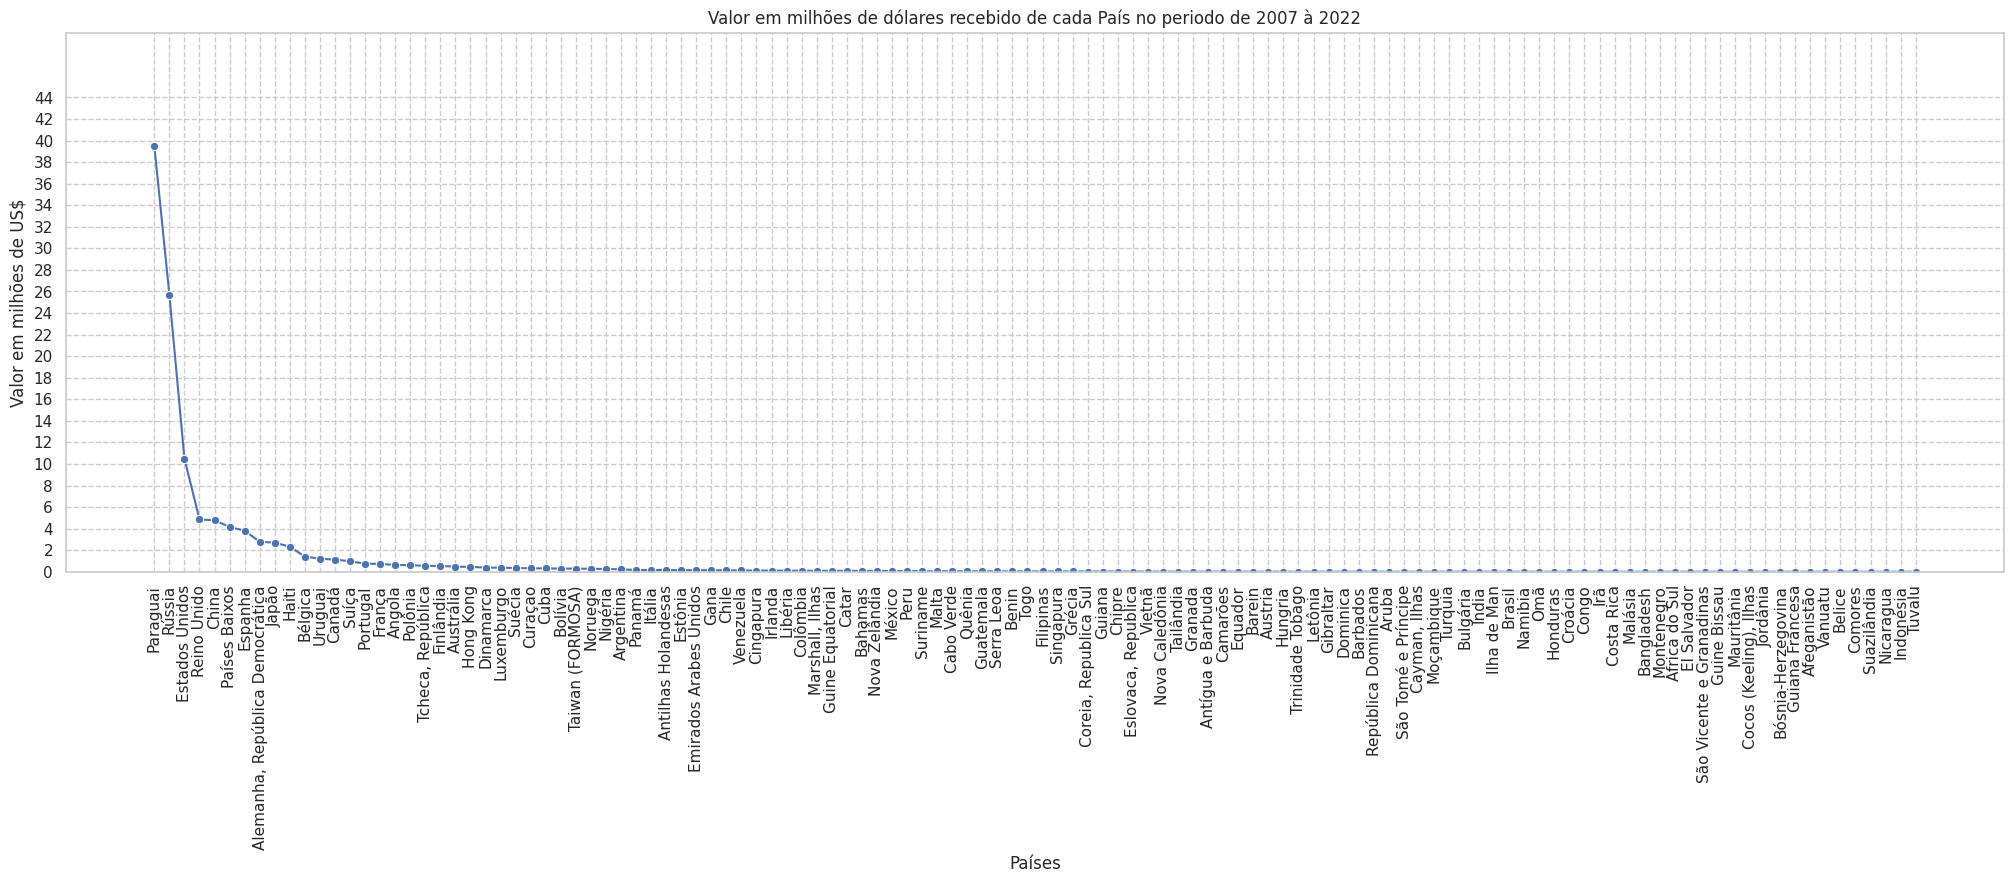

In [ ]:
plt.figure(figsize=(25,7))
axis = sns.lineplot(data=df_maiores_gastos, x='País', y="valor", marker='o')
plt.xticks(rotation=90)
plt.ylim(0,50)
plt.yticks(ticks= np.arange(0, 45, step=2))
axis.xaxis.set_minor_locator(ticker.NullLocator())
plt.grid(linestyle = "--")
plt.title("Valor em milhões de dólares recebido de cada País no periodo de 2007 à 2022")
plt.xlabel("Países")
plt.ylabel("Valor em milhões de US$")
plt.show

In [ ]:
#Nesse dataframe é possível obter os dados de valor arrecadado em todo o periodo
df_maiores_gastos = df_maiores_gastos.sort_values(by="valor", ascending=False)
df_maiores_gastos.head(10)

,valor
País,
Paraguai,39.520550
Rússia,25.677644
Estados Unidos,10.494605
Reino Unido,4.855708
China,4.776915
Países Baixos,4.156362
Espanha,3.808552
"Alemanha, República Democrática",2.784446
Japão,2.694583


## Total arrecadado em milhoes de dólares no período dos últimos 15 anos

In [ ]:
df_maiores_gastos['valor'].sum()

116.33046599999999

No período de 2007 até o ano de 2022 foram arrecadados 116,33 milhoes de dólares.

##Valores recebidos dos 10 países mais expressivos dos últimos 15 anos

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2500x700 with 0 Axes>

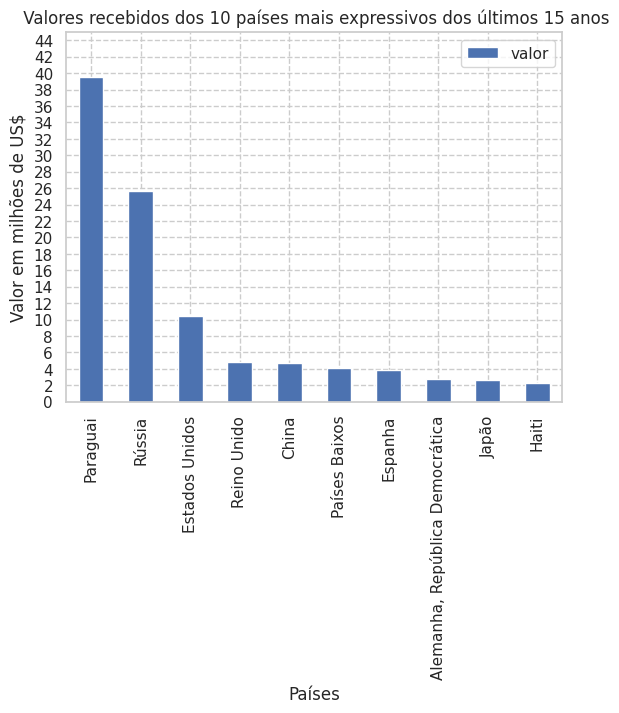

In [ ]:
plt.figure(figsize=(25,7))
df_maiores_gastos.head(10).plot(kind = "bar")
plt.xticks(rotation=90)
plt.ylim(0,45)
plt.yticks(ticks= np.arange(0, 45, step=2))
axis.xaxis.set_minor_locator(ticker.NullLocator())
plt.grid(linestyle = "--")
plt.title(" Valores recebidos dos 10 países mais expressivos dos últimos 15 anos")
plt.xlabel("Países")
plt.ylabel("Valor em milhões de US$")
plt.show

In [ ]:
df_vinho_quantidade

,Id,País,ano,valor,Medida
0,1,Afeganistão,2007,0.000000,Quantidade
1,2,África do Sul,2007,0.000000,Quantidade
2,3,"Alemanha, República Democrática",2007,0.119512,Quantidade
3,4,Angola,2007,0.025931,Quantidade
4,5,Anguilla,2007,0.000000,Quantidade
...,...,...,...,...,...
3963,124,Tuvalu,2022,0.000000,Quantidade
3964,125,Uruguai,2022,0.637117,Quantidade
3965,126,Vanuatu,2022,0.000000,Quantidade
3966,127,Venezuela,2022,0.023220,Quantidade


In [ ]:
df_maiores_quantidades = df_vinho_quantidade.sort_values(by="valor", ascending=False)
df_maiores_quantidades = df_maiores_quantidades.drop(['Id', 'ano', 'Medida'], axis=1)
df_maiores_quantidades = df_maiores_quantidades.loc[617:3609]
df_maiores_quantidades = df_maiores_quantidades.groupby("País").sum()
df_maiores_quantidades

,valor
País,
Afeganistão,0.000011
"Alemanha, República Democrática",1.028563
Angola,0.194799
Antilhas Holandesas,0.114027
Antígua e Barbuda,0.002104
...,...
Vanuatu,0.000018
Venezuela,0.076215
Vietnã,0.009799


<function matplotlib.pyplot.show(close=None, block=None)>

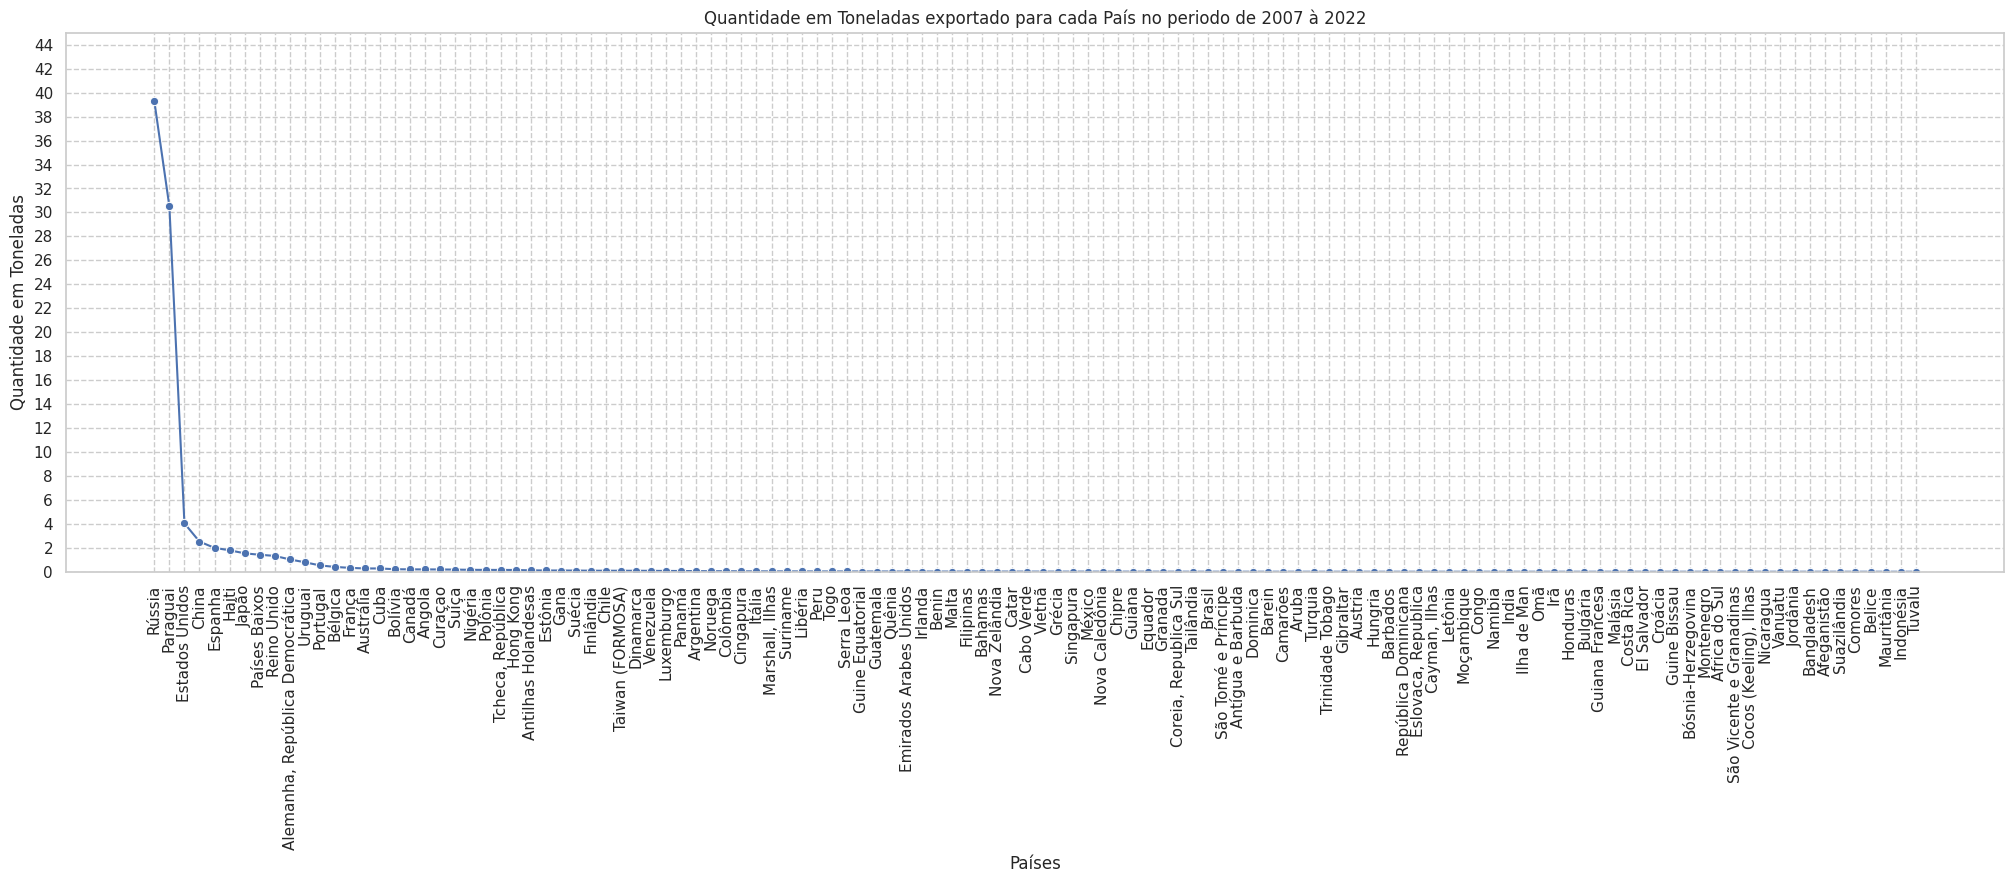

In [ ]:
plt.figure(figsize=(25,7))
axis = sns.lineplot(data=df_maiores_quantidades, x='País', y="valor", marker='o')
plt.xticks(rotation=90)
plt.ylim(0,45)
plt.yticks(ticks= np.arange(0, 45, step=2))
axis.xaxis.set_minor_locator(ticker.NullLocator())
plt.grid(linestyle = "--")
plt.title("Quantidade em Toneladas exportado para cada País no periodo de 2007 à 2022")
plt.xlabel("Países")
plt.ylabel("Quantidade em Toneladas")
plt.show

In [ ]:
#Nesse dataframe é possível obter os dados de quantidade exportada em todo o periodo
df_maiores_quantidades = df_maiores_quantidades.sort_values(by="valor", ascending=False)
df_maiores_quantidades.head(10)

,valor
País,
Rússia,39.296199
Paraguai,30.500229
Estados Unidos,4.042624
China,2.517096
Espanha,1.993000
Haiti,1.791603
Japão,1.539635
Países Baixos,1.417200
Reino Unido,1.324164


## Total exportado em litros no período dos últimos 15 anos

In [ ]:
df_maiores_quantidades['valor'].sum()

91.26418400000003

No período de 2007 até o ano de 2022 foram exportados 91,26 milhoes de litros de vinho.

##Litros de vinho exportados para os 10 países mais expressivos dos últimos 15 anos

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2500x700 with 0 Axes>

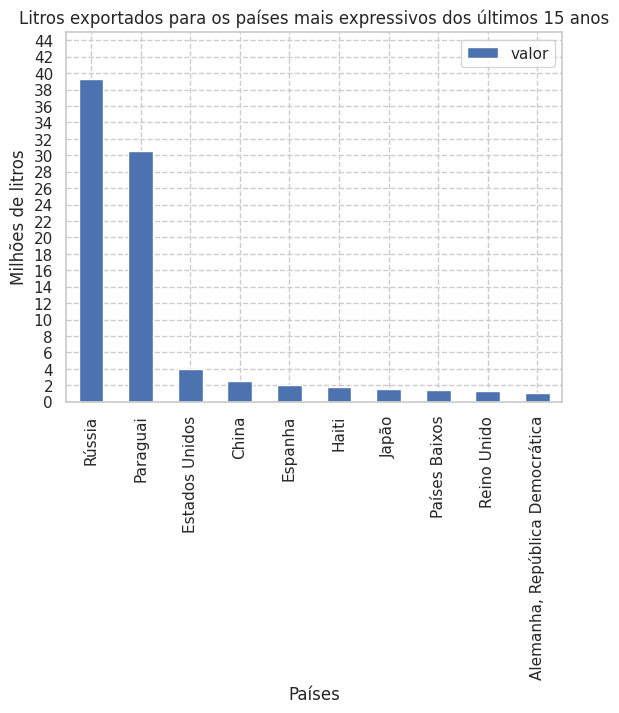

In [ ]:
plt.figure(figsize=(25,7))
df_maiores_quantidades.head(10).plot(kind = "bar")
plt.xticks(rotation=90)
plt.ylim(0,45)
plt.yticks(ticks= np.arange(0, 45, step=2))
axis.xaxis.set_minor_locator(ticker.NullLocator())
plt.grid(linestyle = "--")
plt.title("Litros exportados para os países mais expressivos dos últimos 15 anos")
plt.xlabel("Países")
plt.ylabel("Milhões de litros")
plt.show

###A relação entre as medidas de valores recebidos em milhões de dólares e quantidade em milhões de litros de vinhos exportados

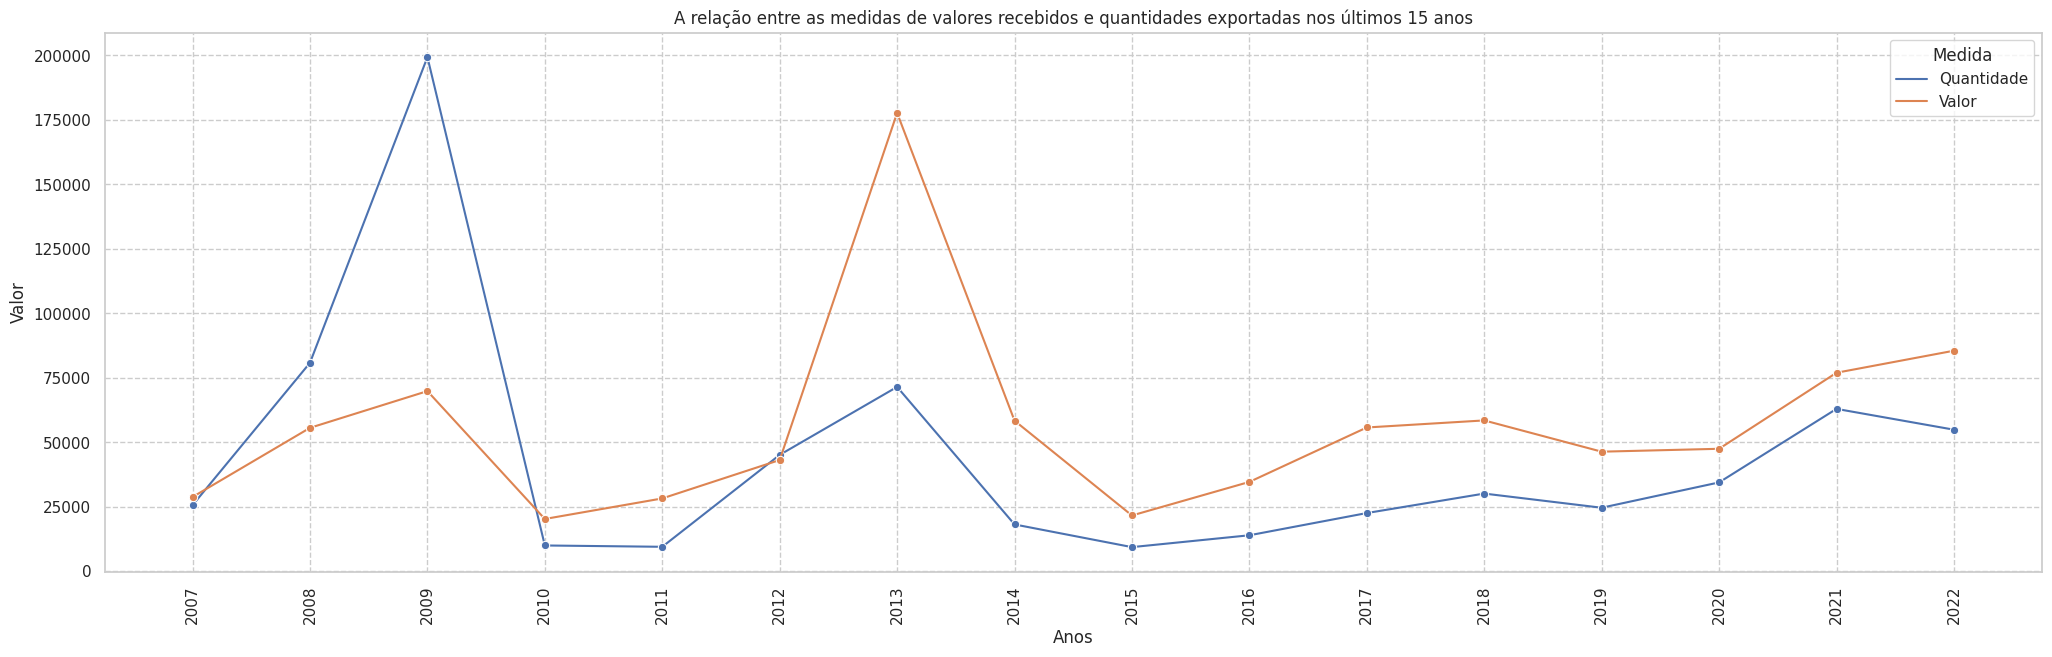

In [ ]:
plt.figure(figsize=(25,7))
sns.lineplot(data=dados_vinho, x='ano', y='valor', hue='Medida', errorbar=None,  marker='o')
plt.xticks(rotation=90)
plt.grid(linestyle = "--")
plt.title("A relação entre as medidas de valores recebidos e quantidades exportadas nos últimos 15 anos")
plt.xlabel("Anos")
plt.ylabel("Valor")
plt.show()

A partir de 2010, observamos que a tendência da linha de valor supera consistentemente a linha de quantidade, e essa dinâmica persiste até a data mais recente. Essa situação pode ser atribuída ao aumento contínuo do valor do dólar a partir de 2010, exercendo um impacto direto em todas as transações comerciais, bem como o aumento das taxas de exportação contribuindo nesse cenário.

## Evolutivo anual dos top 10 países mais expressívos do período

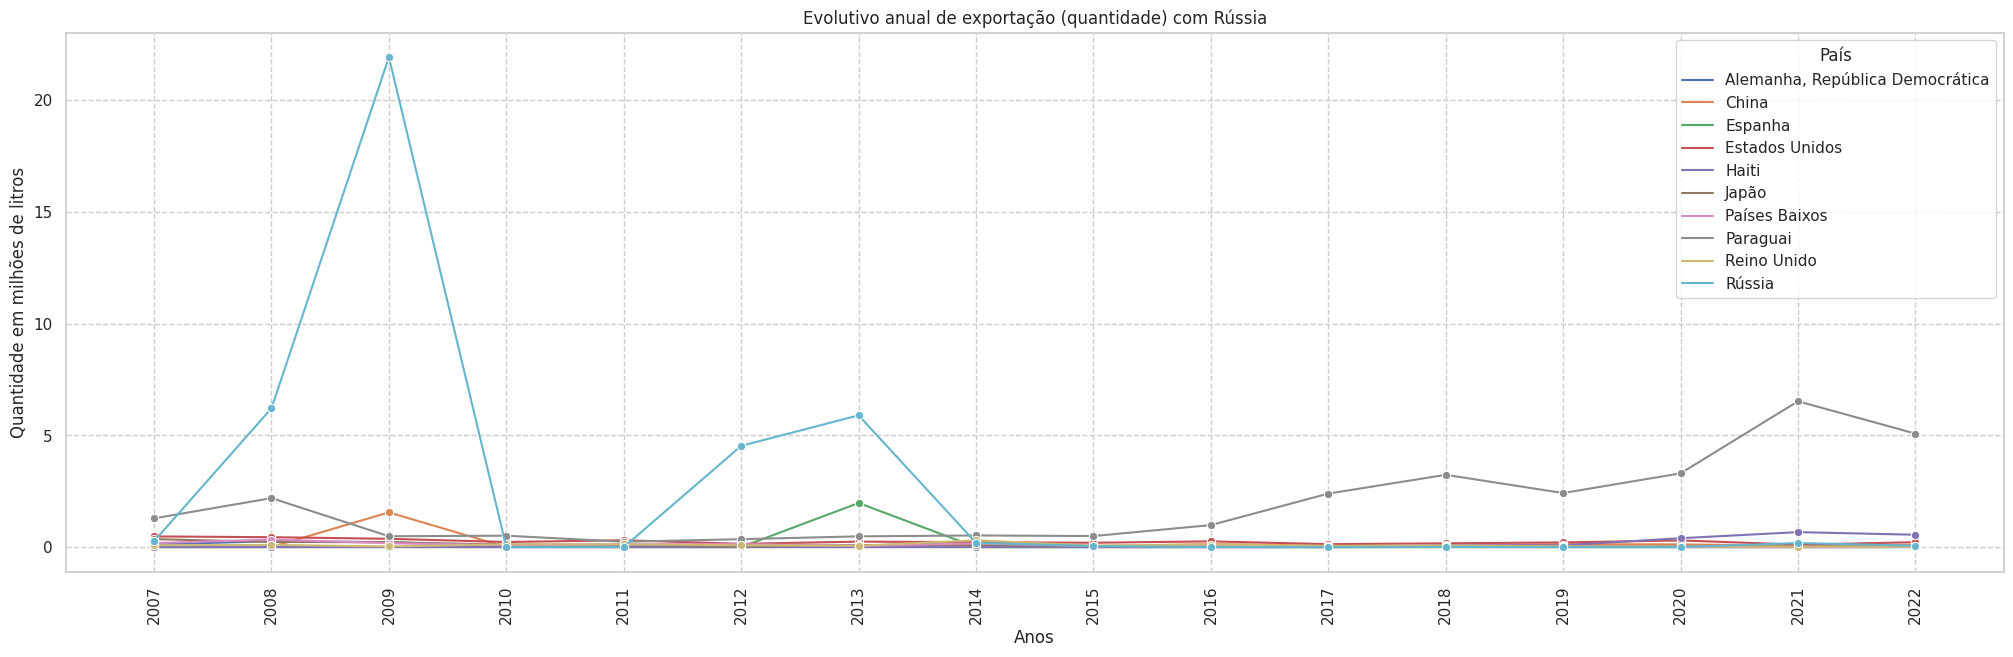

In [ ]:
paises_selecionados = ['Rússia', 'Paraguai',	'Estados Unidos',	'China',	'Espanha',	'Haiti',	'Japão',	'Países Baixos',	'Reino Unido','Alemanha, República Democrática']
df_filtrado = df_vinho_quantidade[df_vinho_quantidade['País'].isin(paises_selecionados)]
plt.figure(figsize=(25,7))
sns.lineplot(data=df_filtrado, x='ano', y='valor', hue='País', marker='o')
plt.xticks(rotation=90)
plt.grid(linestyle = "--")
plt.title("Evolutivo anual de exportação (quantidade) com Rússia")
plt.xlabel("Anos")
plt.ylabel("Quantidade em milhões de litros")
plt.show()

A Rússia embora tenha contribuído significativamente no perído dos últimos 15 anos com a exportação do vinho no Brasil, pode ser considerada como um outlier(dados que se diferenciam drasticamente de todos os outros) pois ao analisar seus dados é possível verificar que os valores mais expressivos concentram-se apenas nos anos de 2008,2009,2012 e 2013. A partir do ano de 2014 até o momento seus valores foram reduzidos drasticamente. Vale ressaltar que a Rússia detém 43.05% das exportações de vinho de todo o período.

## Excluindo a Rússia da análise para ter uma visualização melhor no que se refere a quantidade exportada.

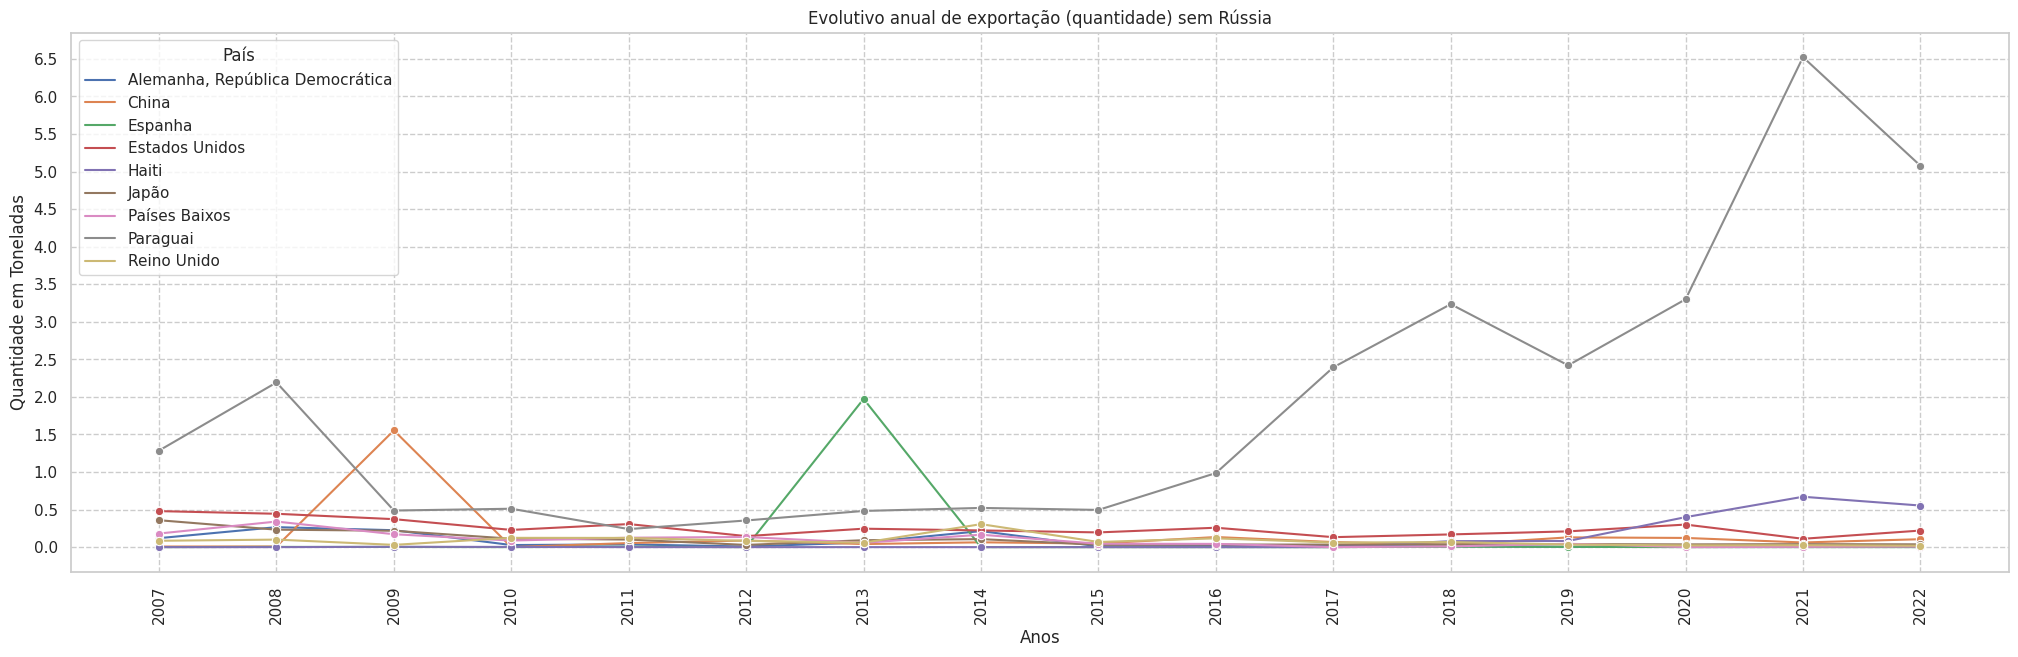

In [ ]:
paises_sem_russia = ['Paraguai',	'Estados Unidos',	'China',	'Espanha',	'Haiti',	'Japão',	'Países Baixos',	'Reino Unido','Alemanha, República Democrática']
df_filtrado_sem_russia  = df_vinho_quantidade[df_vinho_quantidade['País'].isin(paises_sem_russia)]
plt.figure(figsize=(25,7))
sns.lineplot(data=df_filtrado_sem_russia , x='ano', y='valor', hue='País', marker='o')
plt.xticks(rotation=90)
plt.yticks(ticks= np.arange(0, 7, step=0.5))
plt.grid(linestyle = "--")
plt.title("Evolutivo anual de exportação (quantidade) sem Rússia")
plt.xlabel("Anos")
plt.ylabel("Quantidade em Toneladas")
plt.show()

Embora o Paraguai esteja classificado em segundo lugar, destaca-se pelos valores mais significativos ao analisarmos a evolução anual. A partir de 2017, registra um crescimento exponencial, caracterizado por variações positivas em todos os anos, com exceção de 2019. Neste ano, o país enfrentou uma crise política que resultou em uma redução nos valores de exportação. Tal fato deve ser creditado pelo fato do país pertencer ao bloco econômico MERCOSUL (Mercado Comum do Sul) composto por Argentina, Brasil, Paraguai e Uruguai que têm por objetivo promover o comércio, com políticas e acordos que facilitem as trocas entre os participantes.